# Imports 

Library imports generally come in the beginning of the code. In this notebook we let them close to when they are first needed for didatic purposes.

In [1]:
# Always good to have those
# For dealing with matlab-style arrays, we use numpy
import numpy as np  
# For a stronger data structure, pandas
import pandas as pd 

# Loading .mat files: A simple dataset

In [2]:
# Load .mat file
from scipy.io import loadmat

## File is originally a dictionary
data_dict = loadmat('one_to_ten.mat')
print('Data type:\n', type(data_dict))
print('------------------------------')
print('Data:\n', data_dict)
print('------------------------------')
print('Datakeys:\n', data_dict.keys() )

Data type:
 <class 'dict'>
------------------------------
Data:
 {'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Mar 19 18:19:15 2018', '__version__': '1.0', '__globals__': [], 'one2ten': array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])}
------------------------------
Datakeys:
 dict_keys(['__header__', '__version__', '__globals__', 'one2ten'])


In [3]:
## We have to index by the variable name
var_name = 'one2ten'
data = data_dict[var_name]
print(data)

[[ 1  2  3  4  5  6  7  8  9 10]]


# Our beloved Iris Dataset 

In [4]:
## Now to a more interesting (or not) dataset
data = loadmat('iris_dataset.mat')
X, y, names = data['X'], data['y'], data['feat_names']

print('X: ', type(X), X.shape)
print('y: ', type(y), y.shape)
print('names: ', type(names), names.shape)

X:  <class 'numpy.ndarray'> (150, 4)
y:  <class 'numpy.ndarray'> (150, 1)
names:  <class 'numpy.ndarray'> (4,)


In [5]:
df = pd.DataFrame(X, columns = names)
df['target'] = y # you can always add an extra column, if you give a vector of correct size

# Print a random sample of rows
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
69,5.6,2.5,3.9,1.1,1
94,5.6,2.7,4.2,1.3,1
96,5.7,2.9,4.2,1.3,1
91,6.1,3.0,4.6,1.4,1
19,5.1,3.8,1.5,0.3,0


## Visualizations 

In [6]:
# Visualize distribution
## Matplotlib is the default and most widely used python plotting tool
## It is very complete but is somewhat low-level
import matplotlib.pyplot as plt
## Seaborn gives higher-level interaction with an underlying matplotlib
import seaborn as sns
%matplotlib inline

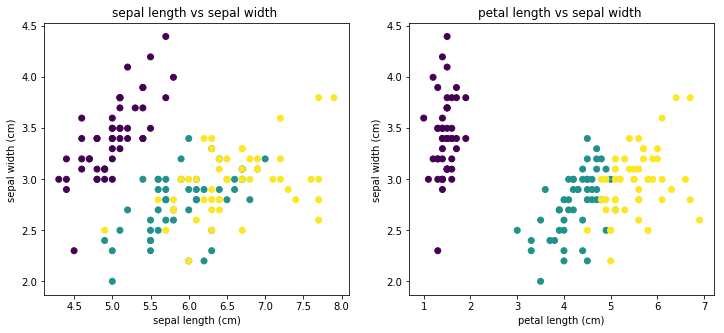

In [7]:
### Function to remove ending of names
### NOT IMPORTANT at this point, only aesthetic
mid = lambda s: s[:-5]

## We could visualize using matplotlib
### Plot the first versus second features, with color corresponding to label
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y.ravel())
plt.xlabel(names[0]); plt.ylabel(names[1])
plt.title('%s vs %s'%(mid(names[0]), mid(names[1])))

plt.subplot(1,2,2)
plt.scatter(X[:,2], X[:,1], c=y.ravel())
plt.xlabel(names[2]); plt.ylabel(names[1])
plt.title('{} vs {}'.format(mid(names[2]), mid(names[1])));

plt.show()

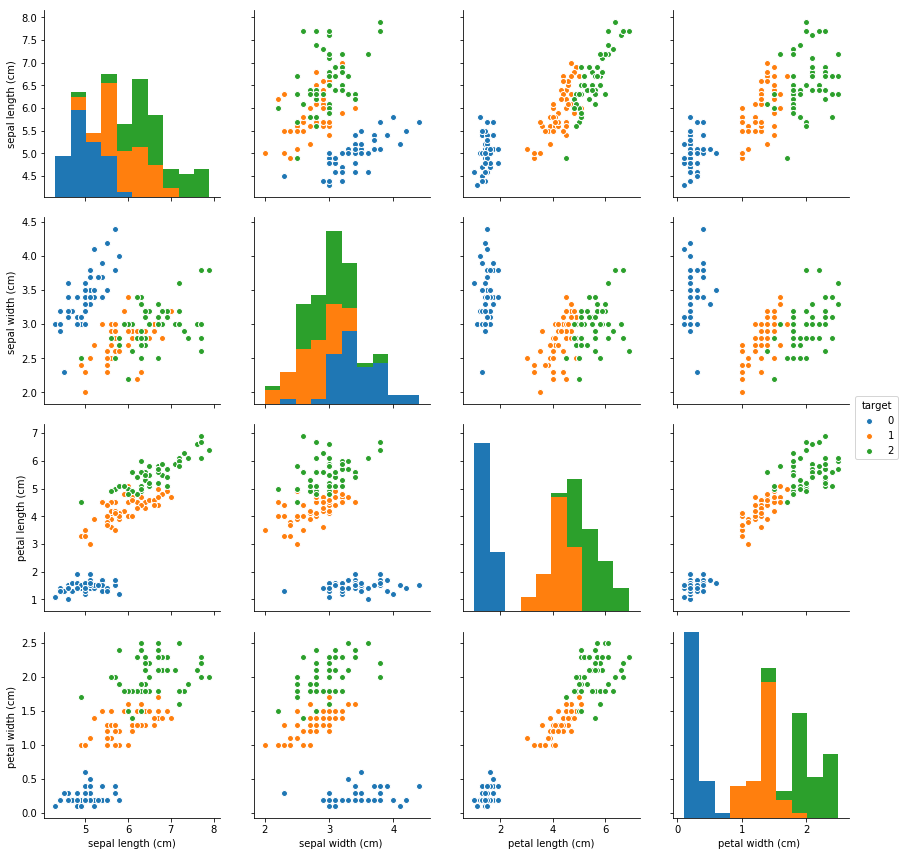

In [8]:
## Using seaborn is easier
sns.pairplot(vars=data['feat_names'], data=df, hue="target", size=3)
#plt.show()

In [9]:
# Still, we want to visualize the distribution, in only two dimensions

## Lets PCA
from sklearn.decomposition import PCA

### PCA is not a function, is a class, but you will get used to it
### This means it has to be initialized by itself, in despite of the dataset
pca = PCA()
### The dataset has to be organized with one observation per row
### and one feature per columns, i.e. (n_observations, n_features)
pca.fit(X)
### The fit method is used by all sklearn models
### Some of then have also the 'predict' method, and some have 'transform'
Xpc = pca.transform(X)
print('Returned dataset format: ', Xpc.shape)

Returned dataset format:  (150, 4)


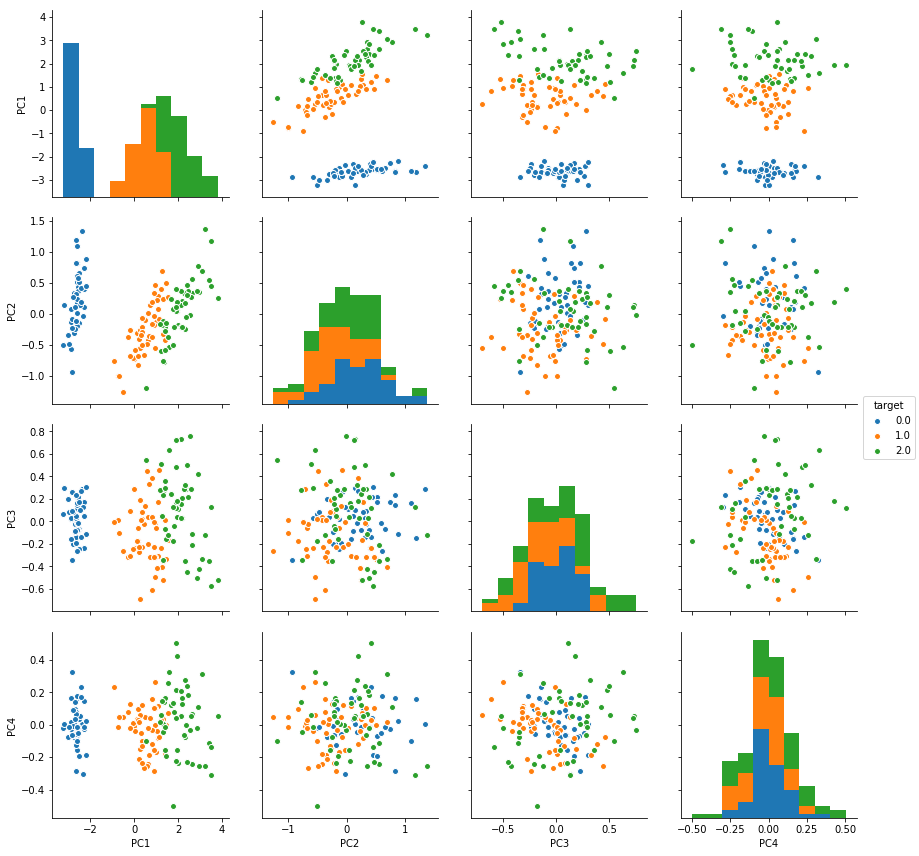

In [10]:
### Is the dataset still the same? lets pairplot
pc_df = pd.DataFrame(np.hstack((Xpc, y)), columns=['PC1', 'PC2', 'PC3', 'PC4', 'target'])
sns.pairplot(vars=pc_df.columns[:-1], data=pc_df, hue="target", size=3)
#plt.show()

In [11]:
### The returned features are the data projected into the principal components,
### and not the original features
print(X.sum(axis=0) == Xpc.sum(axis=0))

[False False False False]


## Lets fit a model 

### The wrong way

/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


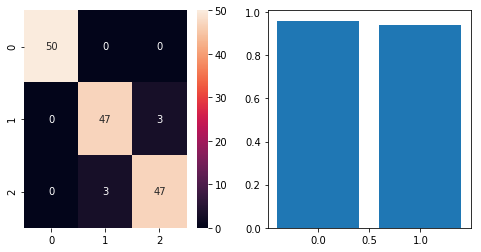

In [13]:
# Lets then predict the classes from the data
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

## Choose a model (1 line)
clf = GaussianNB()

## Fit the model (1 line) (now we will do the wrong way - no splitting)
clf.fit(X, y)

## Predict (1 line)
y_pred = clf.predict(X)

## Look at results
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.heatmap( confusion_matrix(y, y_pred) , annot=True);
plt.subplot(1,2,2)
widths = [0,1]; heights = [accuracy_score(y,y_pred), cohen_kappa_score(y, y_pred)]
plt.bar(widths, heights);

This is not right. The model is very probably overfitting, as we used the same data for training and evaluation. We must separate the data into training and testing.

### The right way

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90, 4) (60, 4) (90, 1) (60, 1)


/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


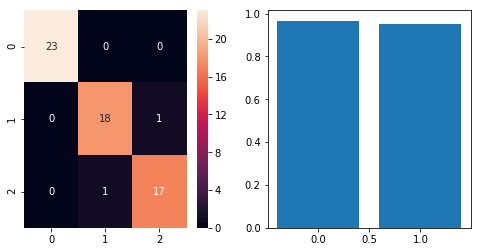

In [16]:
clf = GaussianNB()
## Use the same model for comparison.
## Fit the model (1 line) (now we will do the right way
clf.fit(X_train, y_train)

## Predict (1 line) - Use now the test set
y_pred = clf.predict(X_test)

## Look at results
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.heatmap( confusion_matrix(y_test, y_pred) , annot=True);
plt.subplot(1,2,2)
widths = [0,1]; heights = [accuracy_score(y_test,y_pred), cohen_kappa_score(y_test, y_pred)]
plt.bar(widths, heights);

Unfortunately for didatic purposes, the iris dataset is so easy to do classification, that the scores do not change a lot when separating a fold for testing. In harder classification tasks, this is not so.

## Digits dataset

### Load dataset

In [64]:
from sklearn import datasets
digits = datasets.load_digits()
X, y, classes = digits.data, digits.target, digits.target_names
print(X.shape, y.shape, classes.shape)

(1797, 64) (1797,) (10,)


### Separate train and test

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1078, 64) (719, 64) (1078,) (719,)


### Fit, predict, score

#### The hard way

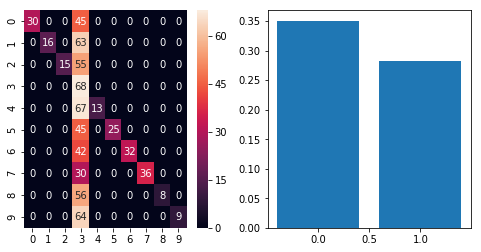

In [372]:
clf = SVC(probability=True)

## Fit the model
clf.fit(X_train, y_train)

## Predict 
y_pred = clf.predict(X_test)

## Look at results
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.heatmap( confusion_matrix(y_test, y_pred) , annot=True);
plt.subplot(1,2,2)
widths = [0,1]; heights = [accuracy_score(y_test,y_pred), cohen_kappa_score(y_test, y_pred)]
plt.bar(widths, heights);

#### The easy way
With cross_val_score, we only have access to the final score of each fold

In [373]:
from sklearn.model_selection import cross_val_score

In [374]:
from sklearn.metrics import make_scorer
score_func = make_scorer(cohen_kappa_score)
scores_default = cross_val_score(clf, X, y, cv=5)
scores_kappa = cross_val_score(clf, X, y, cv=5, scoring = score_func)

In [375]:
scores = pd.DataFrame({'default':scores_default, 'kappa': scores_kappa, 'cv':np.arange(5)})
scores.sample(5)

,cv,default,kappa
2,2,0.415042,0.349851
3,3,0.487395,0.430056
1,1,0.408840,0.342059
4,4,0.498592,0.442287
0,0,0.434066,0.370306


In [376]:
# We will melt the dataframe to 'tidy' format, which seaborn generally uses
scores.melt(id_vars='cv').sample(5)

,cv,variable,value
9,4,kappa,0.442287
5,0,kappa,0.370306
3,3,default,0.487395
8,3,kappa,0.430056
6,1,kappa,0.342059


(0, 1)

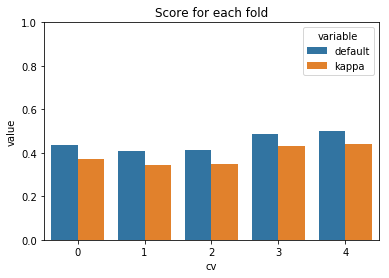

In [377]:
sns.barplot(x='cv', y='value',hue='variable', data=scores.melt(id_vars='cv'))
# Seaborn uses matplotlib under the hood. We use plt to change style
plt.title('Score for each fold'); plt.ylim(0,1)

#### Can't we have both?

In [378]:
from sklearn.model_selection import cross_val_predict

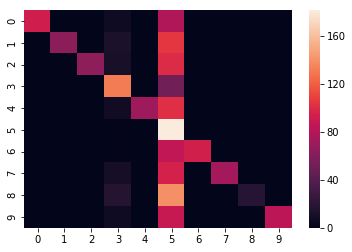

In [379]:
y_pred = cross_val_predict(clf, X, y, cv=10)
sns.heatmap( confusion_matrix(y, y_pred))

### Continuous measure (optional)

In [380]:
clf.fit(X_train, y_train)
# We will use the predicted probability for each class, instead of the final classification
probas = clf.predict_proba(X_test)
# The size of output will be (n_samples, n_classes)
print(probas.shape)

(719, 10)


In [381]:
# Lets facilitate analysis using dataframes
probas = pd.DataFrame(probas, columns= classes)
probas['true_label'] = y_test

In [382]:
probas.head()

,0,1,2,3,4,5,6,7,8,9,true_label
0,0.048076,0.069203,0.103642,0.116644,0.153391,0.121252,0.039838,0.101959,0.128586,0.117410,4
1,0.048106,0.069218,0.103788,0.116926,0.151601,0.121595,0.039833,0.102553,0.128891,0.117489,4
2,0.073110,0.073530,0.106755,0.119705,0.099378,0.124990,0.041656,0.111140,0.132125,0.117610,0
3,0.045835,0.068953,0.073094,0.112638,0.101915,0.080010,0.031651,0.083782,0.090616,0.311506,9
4,0.007684,0.014651,0.010416,0.013234,0.029828,0.011494,0.877809,0.011746,0.012060,0.011077,6


In [383]:
mean_proba_per_label = probas.groupby('true_label').mean()
mean_proba_per_label

,0,1,2,3,4,5,6,7,8,9
true_label,,,,,,,,,,
0,0.369467,0.051822,0.075106,0.082214,0.066310,0.082186,0.028070,0.072491,0.088794,0.083539
1,0.044960,0.214472,0.092789,0.110904,0.083760,0.108421,0.035336,0.095967,0.110372,0.103018
2,0.050808,0.072218,0.181490,0.116629,0.098687,0.106796,0.037345,0.104560,0.124711,0.106756
3,0.050167,0.073551,0.102998,0.163464,0.097627,0.122125,0.038456,0.107440,0.128920,0.115253
4,0.047764,0.067957,0.101884,0.114666,0.166115,0.119076,0.038995,0.100302,0.126496,0.116745
5,0.051485,0.073632,0.098460,0.120289,0.100077,0.160798,0.039269,0.108345,0.135140,0.112505
6,0.035586,0.051992,0.065763,0.077977,0.075320,0.075826,0.392387,0.071623,0.082308,0.071216
7,0.045830,0.068082,0.093864,0.110767,0.088219,0.108602,0.035475,0.228275,0.117207,0.103678
8,0.052395,0.073381,0.105874,0.120561,0.100524,0.127679,0.040621,0.110479,0.152733,0.115752


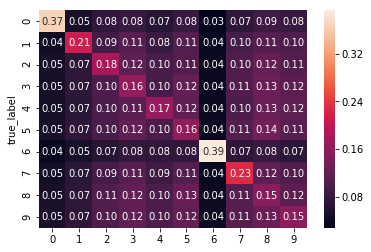

In [384]:
sns.heatmap( probas.groupby('true_label').mean(), annot=True, fmt='.2f')

In [385]:
probas['pred_label'] = probas.drop('true_label',axis=1).idxmax(axis=1)

probas['proba_of_predicted'] = probas.apply(lambda x: x[x.pred_label.astype(int)], axis=1)

errors = probas[ probas.true_label != probas.pred_label ].sort_values('proba_of_predicted')

less_certain = errors.index[0]
more_certain = errors.index[-1]

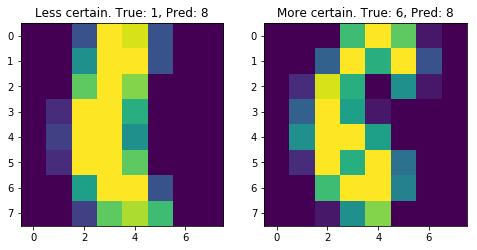

In [386]:
plt.figure(figsize=(8,10))

plt.subplot(1,2,1)
plt.imshow(X_test[less_certain,:].reshape(8,8))
plt.title('Less certain. True: %d, Pred: %d'%tuple(probas.loc[less_certain][['true_label','pred_label']]))

plt.subplot(1,2,2)
plt.imshow(X_test[more_certain,:].reshape(8,8))
plt.title('More certain. True: %d, Pred: %d'%tuple(probas.loc[more_certain][['true_label','pred_label']]));

## Hyperparameter tuning

In [387]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [388]:
clf = SVC()

param_dict = {'C' : np.logspace(-2, 2, 5), 
              'gamma' : np.logspace(-7, 1, 5) }

grid = GridSearchCV(clf, param_dict, scoring = score_func, cv=3)

In [389]:
%%time
grid.fit(X, y);

CPU times: user 26.8 s, sys: 0 ns, total: 26.8 s
Wall time: 26.8 s


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02]), 'gamma': array([  1.00000e-07,   1.00000e-05,   1.00000e-03,   1.00000e-01,
         1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(cohen_kappa_score), verbose=0)

In [390]:
print( grid.best_params_ )

{'C': 10.0, 'gamma': 0.001}


In [391]:
best = grid.best_estimator_

In [392]:
grid.best_score_

0.97341190304539882

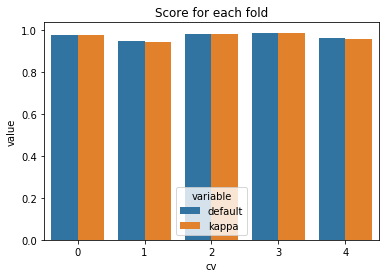

In [395]:
scores_default = cross_val_score(best, X, y, cv=5)
scores_kappa = cross_val_score(best, X, y, cv=5, scoring = score_func)
scores = pd.DataFrame({'default':scores_default, 'kappa': scores_kappa, 'cv':np.arange(5)})
sns.barplot(x='cv', y='value',hue='variable', data=scores.melt(id_vars='cv'))
plt.title('Score for each fold');